# Evaluate trained models on a task and check success rate 

Load the necessary library

In [42]:
import numpy as np

from omegaconf import DictConfig
import datetime
from omniisaacgymenvs.utils.hydra_cfg.hydra_utils import *
from omniisaacgymenvs.utils.hydra_cfg.reformat import omegaconf_to_dict, print_dict
from rl_games.algos_torch.players import PpoPlayerDiscrete
from rl_games.algos_torch.players import BasicPpoPlayerContinuous, BasicPpoPlayerDiscrete

from omniisaacgymenvs.utils.rlgames.rlgames_utils import RLGPUAlgoObserver, RLGPUEnv

from omniisaacgymenvs.scripts.rlgames_train import RLGTrainer
from rl_games.torch_runner import Runner
from omniisaacgymenvs.utils.task_util import initialize_task
from omniisaacgymenvs.envs.vec_env_rlgames import VecEnvRLGames
from omniisaacgymenvs.utils.config_utils.path_utils import retrieve_checkpoint_path
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from torch._C import fork
from gym import spaces
import numpy as np
import torch
import yaml
import os

import pandas as pd

from plot_experiment import plot_episode_data_virtual
from eval_metrics import success_rate_from_distances

In [45]:
load_dir = "../evaluations/fail_penalty/"
experiments = os.listdir(load_dir)

# getting all the actions for all the episodes under the @load_dir experiments
all_actions = [pd.read_csv(load_dir + experiment + "/" + ep + "/actions.csv", index_col=None)
                        for experiment in experiments for ep in os.listdir(load_dir + experiment) if ".png" not in ep]

In [47]:
print(all_actions[0].shape)

(500, 9)


In [48]:
print(len(all_actions))
for i in range(len(all_actions)):
    all_actions[i].drop(columns=["Unnamed: 0"], inplace=True)

all_actions[0].head()

9


,0,1,2,3,4,5,6,7
0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0
3,1,0,0,0,1,0,1,0
4,0,0,0,0,1,0,1,0


In [50]:
all_actions[2].shape

(500, 8)

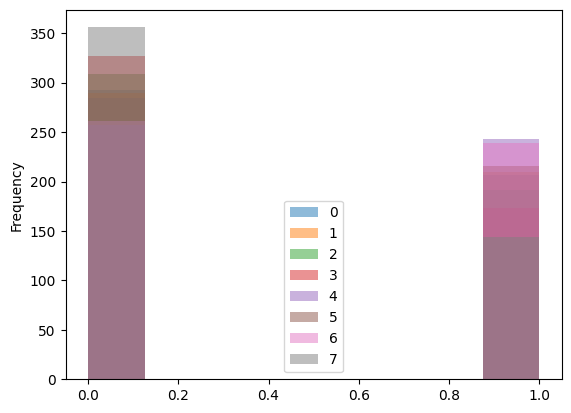

In [54]:
ax = all_actions[0].plot.hist(bins=all_actions[0].shape[1], alpha=0.5)

In [58]:
all_actions[0].value_counts()

0  1  2  3  4  5  6  7
0  1  0  0  1  0  0  0    19
1  0  0  0  0  0  1  0    17
0  0  0  1  0  0  1  0    16
      1  0  0  0  0  0    16
1  0  0  1  0  1  1  0    15
                          ..
0  0  0  0  1  1  1  0     1
   1  1  1  0  0  1  1     1
1  0  1  1  1  1  0  0     1
0  1  0  0  0  1  0  0     1
         1  1  1  1  1     1
Length: 148, dtype: int64